In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [75]:
df = pd.read_csv("USJH_order_dataset.csv")
df.columns

/Users/hee-wonchang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,29,30,34,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping', 'Taxes',
       'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem fulfillment status', 'Shipping Street', 'Shipping Address1',
       'Shipping Address2', 'Shipping Company', 'Shipping City',
       'Shipping Zip', 'Shipping Province', 'Shipping Country', 'Notes',
       'Note Attributes', 'Cancelled at', 'Payment Method', 'Refunded Amount',
       'Vendor', 'Tags', 'Risk Level', 'Source', 'Lineitem name.1', 'Color ',
       'Unnamed: 39', 'Unnamed: 40', 'Tax 3 Name'],
      dtype='object')

In [76]:
df.drop(['Unnamed: 39', 'Unnamed: 40', 'Tax 3 Name','Note Attributes','Tags','Shipping Address2'], axis=1, inplace=True)

In [77]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['Name', 'Financial_Status', 'Paid_at', 'Fulfillment_Status',
       'Accepts_Marketing', 'Currency', 'Subtotal', 'Shipping', 'Taxes',
       'Total', 'Discount_Code', 'Discount_Amount', 'Shipping_Method',
       'Created_at', 'Lineitem_quantity', 'Lineitem_name', 'Lineitem_price',
       'Lineitem_compare_at_price', 'Lineitem_sku',
       'Lineitem_fulfillment_status', 'Shipping_Street', 'Shipping_Address1',
       'Shipping_Company', 'Shipping_City', 'Shipping_Zip',
       'Shipping_Province', 'Shipping_Country', 'Notes', 'Cancelled_at',
       'Payment_Method', 'Refunded_Amount', 'Vendor', 'Risk_Level', 'Source',
       'Lineitem_name.1', 'Color_'],
      dtype='object')

In [78]:
df.head()

,Name,Financial_Status,Paid_at,Fulfillment_Status,Accepts_Marketing,Currency,Subtotal,Shipping,Taxes,Total,...,Shipping_Country,Notes,Cancelled_at,Payment_Method,Refunded_Amount,Vendor,Risk_Level,Source,Lineitem_name.1,Color_
0,#4746,paid,7/16/18 12:31,unfulfilled,yes,USD,100.5,13.64,0.0,114.14,...,US,NaN,NaN,Shopify Payments,0.0,US Jewelry House,Low,web,Turquoise Crystal Rhinestone Ring,GDTQ
1,#4746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,US Jewelry House,NaN,NaN,Turquoise Crystal Rhinestone Ring,GDTQ
2,#4746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,impression,NaN,NaN,Tri Tone Cubic Zirconia Paved Simple Band Ring...,Size 8
3,#4746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ella,NaN,NaN,Geometric Tortoise Link Long Necklace,Brown
4,#4746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Stylist,NaN,NaN,Acetate Skinny Bangle Bracelet With Front Clos...,White/Brown


In [79]:
df.apply(lambda x: x.isna().sum()/len(df)).sort_values(ascending=False)

Cancelled_at                   0.999348
Notes                          0.996928
Discount_Code                  0.995263
Paid_at                        0.988548
Shipping_Province              0.956858
Shipping_Method                0.956672
Shipping_Zip                   0.956567
Shipping_Company               0.956543
Shipping_Street                0.956485
Shipping_Address1              0.956485
Shipping_City                  0.956485
Shipping_Country               0.956485
Fulfillment_Status             0.956404
Currency                       0.956404
Subtotal                       0.956404
Shipping                       0.956404
Discount_Amount                0.956404
Accepts_Marketing              0.956404
Total                          0.956404
Taxes                          0.956404
Payment_Method                 0.956404
Refunded_Amount                0.956404
Financial_Status               0.956404
Risk_Level                     0.956404
Source                         0.956404


### Columns where NA's can be filled in from the line above (eg, same order ID)

In [80]:
fill_na_above = ['Financial_Status', 'Paid_at', 'Fulfillment_Status',
       'Accepts_Marketing', 'Currency', 'Subtotal', 'Shipping', 'Taxes',
       'Total', 'Shipping_Method', 'Shipping_Street', 'Shipping_Address1',
       'Shipping_Address2', 'Shipping_Company', 'Shipping_City',
       'Shipping_Zip', 'Shipping_Province', 'Shipping_Country',
       'Payment_Method','Risk_Level', 'Source']

drop = []

In [8]:
df.loc[:,fill_na_above] = df.loc[:,fill_na_above].fillna(method='ffill')
df.head()

,Name,Financial_Status,Paid_at,Fulfillment_Status,Accepts_Marketing,Currency,Subtotal,Shipping,Taxes,Total,...,Refunded_Amount,Vendor,Tags,Risk_Level,Source,Lineitem_name.1,Color_,Unnamed:_39,Unnamed:_40,Tax_3_Name
0,#4746,paid,7/16/18 12:31,unfulfilled,yes,USD,100.5,13.64,0.0,114.14,...,0.0,US Jewelry House,NaN,Low,web,Turquoise Crystal Rhinestone Ring,GDTQ,NaN,NaN,NaN
1,#4746,paid,7/16/18 12:31,unfulfilled,yes,USD,100.5,13.64,0.0,114.14,...,NaN,US Jewelry House,NaN,Low,web,Turquoise Crystal Rhinestone Ring,GDTQ,NaN,NaN,NaN
2,#4746,paid,7/16/18 12:31,unfulfilled,yes,USD,100.5,13.64,0.0,114.14,...,NaN,impression,NaN,Low,web,Tri Tone Cubic Zirconia Paved Simple Band Ring...,Size 8,NaN,NaN,NaN
3,#4746,paid,7/16/18 12:31,unfulfilled,yes,USD,100.5,13.64,0.0,114.14,...,NaN,Ella,NaN,Low,web,Geometric Tortoise Link Long Necklace,Brown,NaN,NaN,NaN
4,#4746,paid,7/16/18 12:31,unfulfilled,yes,USD,100.5,13.64,0.0,114.14,...,NaN,Stylist,NaN,Low,web,Acetate Skinny Bangle Bracelet With Front Clos...,White/Brown,NaN,NaN,NaN


### Check NA's per columns

In [9]:
df.apply(lambda x: x.isna().sum()/len(df))

Name                           0.000000
Financial_Status               0.000000
Paid_at                        0.000000
Fulfillment_Status             0.000000
Accepts_Marketing              0.000000
Currency                       0.000000
Subtotal                       0.000000
Shipping                       0.000000
Taxes                          0.000000
Total                          0.000000
Discount_Code                  0.995263
Discount_Amount                0.956404
Shipping_Method                0.000000
Created_at                     0.000000
Lineitem_quantity              0.000000
Lineitem_name                  0.000000
Lineitem_price                 0.000000
Lineitem_compare_at_price      0.917952
Lineitem_sku                   0.519674
Lineitem_fulfillment_status    0.000000
Shipping_Street                0.000000
Shipping_Address1              0.000000
Shipping_Address2              0.000244
Shipping_Company               0.000000
Shipping_City                  0.000000


### Items with largest purchases in total quantity

In [29]:
df.groupby("Lineitem_name").agg({"Name":"count"}).sort_values("Name",ascending=0)

,Name
Lineitem_name,
Urban Geometric Metal Hoop Earrings - Gold,240
Lightweight Urban Brass Earrings - Gold,174
Urban Geometric Metal Hoop Earrings - Silver,164
Lightweight Urban Brass Earrings - Silver,140
Geometric Metal Hoop Earrings - Gold,121
Unisex Leather Bracelet,119
Lightweight Filigree Earrings - Gold,99
Urban Geometric Metal Hoop Earrings - Rose Gold,97
Stering Silver Cubic Zirconia Studs Earrings - Silver,84


### Items with largest purchases from differing orders

In [31]:
#Items from highest number of differing orders
df.groupby("Lineitem_name").agg({"Name": pd.Series.nunique}).sort_values("Name", ascending=False)

,Name
Lineitem_name,
Urban Geometric Metal Hoop Earrings - Gold,108
Lightweight Urban Brass Earrings - Gold,99
Lightweight Urban Brass Earrings - Silver,89
Urban Geometric Metal Hoop Earrings - Silver,86
Geometric Metal Hoop Earrings - Gold,74
Lightweight Filigree Earrings - Gold,67
Urban Geometric Metal Hoop Earrings - Rose Gold,56
Filigree Earrings - Gold,56
Lightweight Filigree Earrings - Rhodium,56


### Checking words with highest occurence in orders

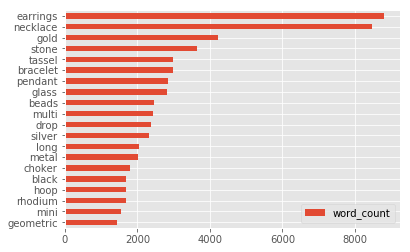

In [88]:
#Create a dictionary to see words with highest occurence in orders
item_string = " ".join(df.Lineitem_name.unique()).split()
item_dict = {}

for i in item_string:
    if i in item_dict.keys():
        item_dict[i] += 1
    else:
        item_dict[i] = 1
        
item_dict

#turning dictionary into dataframe
item_wordcount = pd.DataFrame(pd.Series(item_dict)).rename(columns = {0:"word_count"})
item_wordcount = item_wordcount.sort_values("word_count", ascending=False)
item_wordcount = item_wordcount.drop("-", axis=0)

#plotting results
plot_wordcount = item_wordcount.head(20)
plot_wordcount.sort_values('word_count', ascending=1).plot(kind="barh")


### EDA

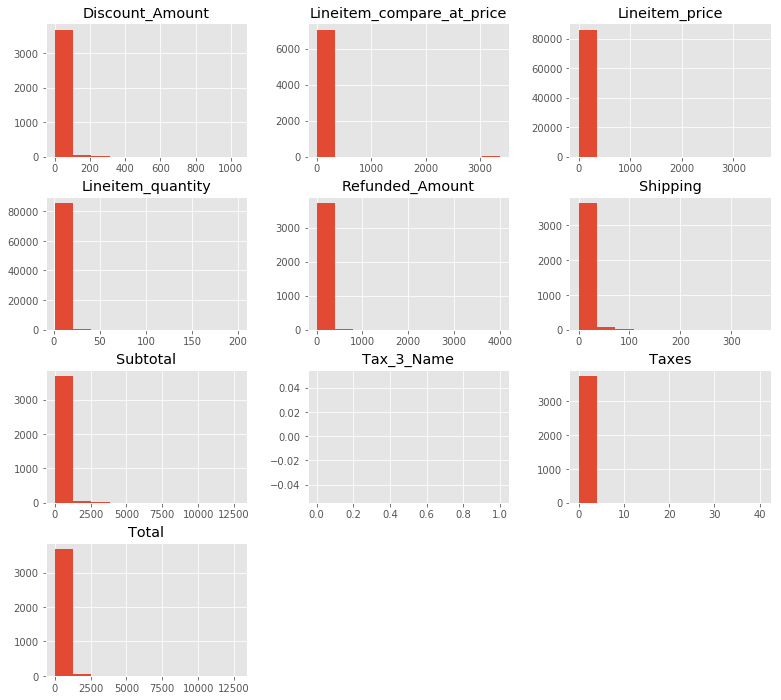

In [67]:
hists = df.hist(figsize=(13,12))

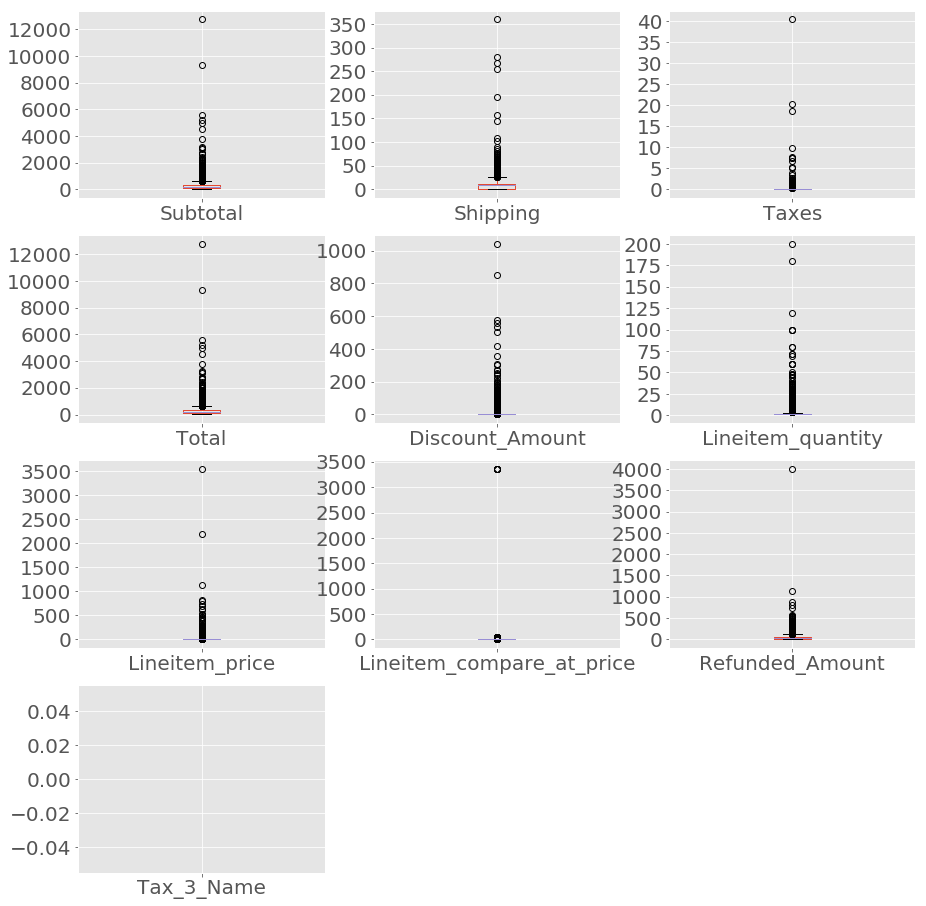

In [69]:
box = df.plot(kind='box', subplots=True, fontsize=20,layout=(5,3), sharex=False, sharey=False, figsize=(15,20))

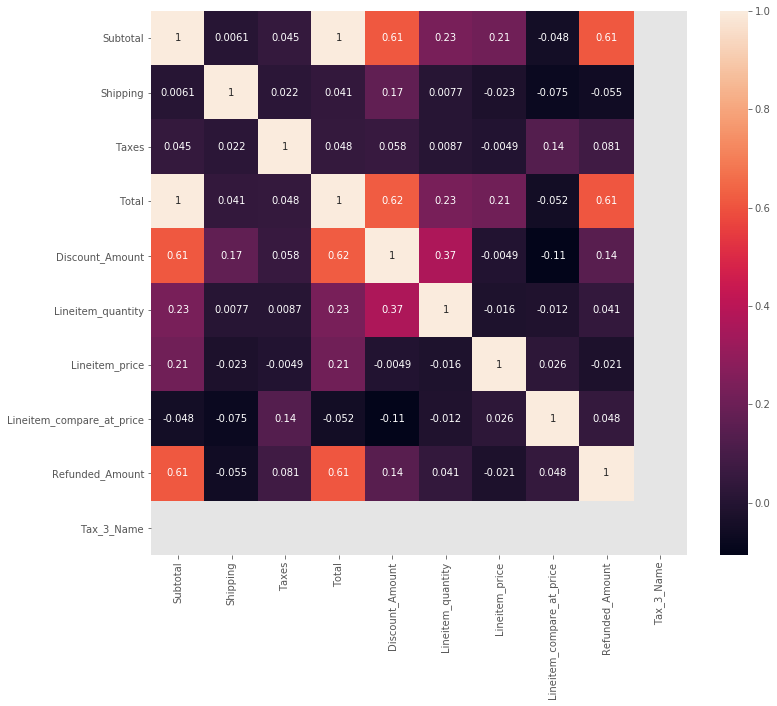

In [71]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True)

Text(0.5,0,'no. of sales')

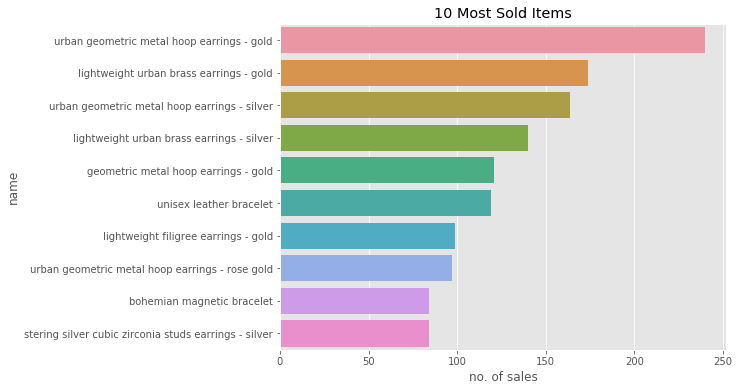

In [85]:
df['Lineitem_name'] = df['Lineitem_name'].str.lower()
ten_most_sold = pd.DataFrame(df['Lineitem_name'].value_counts())[:10]
ten_most_sold['name'] = ten_most_sold.index
ten_most_sold.reset_index(inplace=True)
plt.figure(figsize=(8,6))
plt.title('10 Most Sold Items')
sns.barplot(x = 'Lineitem_name', y='name', data=ten_most_sold)
plt.xlabel('no. of sales') #by year

Text(0.5,0,'no. of sales')

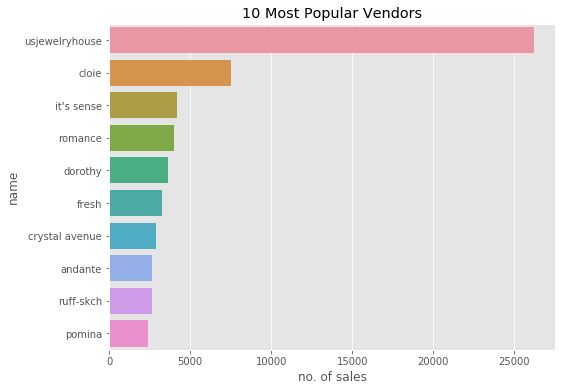

In [87]:
df['Vendor'] = df['Vendor'].str.lower()
pop_vend = pd.DataFrame(df['Vendor'].value_counts())[:10]
pop_vend['name'] = pop_vend.index
pop_vend.reset_index(inplace=True)
plt.figure(figsize=(8,6))
plt.title('10 Most Popular Vendors')
sns.barplot(x='Vendor', y='name', data=pop_vend)
plt.xlabel('no. of sales')